# Convolutional Neural Network

In [1]:
# Import Libraries
# - Tensorflow
# - Keras
# - numpy and random

#import tensorflow as tf
import tensorflow.compat.v1 as tf
from tensorflow.keras import models
from tensorflow.keras import layers

import random
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
tf . print(tf. __version__)

2.11.0


In [3]:
random.seed(42)         # Initialize the random number generator.
np.random.seed(42)      # With the seed reset, the same set of numbers will appear every time. 
tf.set_random_seed(42)  # sets the graph-level random seed

## Dataset - MNIST

In [4]:
# Use the MNIST dataset  of Keras.

mnist = tf.keras.datasets.mnist

(Xtrain, Ytrain), (Xtest,Ytest) = mnist.load_data()

# Display size of dataset
Xtrain = Xtrain.reshape((60000,28,28,1))
Xtrain = Xtrain.astype('float32')/255

Xtest = Xtest.reshape((10000,28,28,1))
Xtest = Xtest.astype('float32')/255

Ytrain = tf.keras.utils.to_categorical(Ytrain)
Ytest = tf.keras.utils.to_categorical(Ytest) 

print(Xtrain.shape, Xtest.shape)
print(Ytrain.shape, Ytest.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)
(60000, 10) (10000, 10)


## Create a CNN Model

In [5]:
# Create a Sequential model object
cnnModel = models.Sequential()

# Add layers Conv2D for CNN and sepcify MaxPooling

# Layer 1 = input layer
cnnModel.add(layers.Conv2D(32, (3,3), activation="relu", input_shape=(28,28,1) ))

cnnModel.add(layers.MaxPooling2D((2,2)))


# Layer 2
cnnModel.add(layers.Conv2D(64, (3,3), activation="relu"))

cnnModel.add(layers.MaxPooling2D((2,2)))


# Layer 3
cnnModel.add(layers.Conv2D(64, (3,3), activation="relu" ))

cnnModel.add(layers.Flatten())


# Add Dense layers or fully connected layers
# Layer 4
cnnModel.add(layers.Dense(64, activation="relu" ))

# Layer 5
cnnModel.add(layers.Dense(32, activation="relu" ))

# Layer 6
cnnModel.add(layers.Dense(10, activation="softmax" ))

cnnModel.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [6]:
# Configure  the model for training, by using appropriate optimizers and regularizations
# Available optimizer: adam, rmsprop, adagrad, sgd
# loss:  objective that the model will try to minimize. 
# Available loss: categorical_crossentropy, binary_crossentropy, mean_squared_error
# metrics: List of metrics to be evaluated by the model during training and testing. 

cnnModel.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])


In [7]:
# train the model

history = cnnModel.fit(Xtrain, Ytrain, epochs = 25, batch_size = 64, validation_split = 0.1)

Epoch 1/25
844/844 [==============================] - 43s 47ms/step - loss: 0.2225 - accuracy: 0.9316 - val_loss: 0.0641 - val_accuracy: 0.9808
Epoch 2/25
844/844 [==============================] - 38s 45ms/step - loss: 0.0572 - accuracy: 0.9825 - val_loss: 0.0533 - val_accuracy: 0.9835
Epoch 3/25
844/844 [==============================] - 39s 46ms/step - loss: 0.0421 - accuracy: 0.9866 - val_loss: 0.0439 - val_accuracy: 0.9870
Epoch 4/25
844/844 [==============================] - 40s 48ms/step - loss: 0.0314 - accuracy: 0.9896 - val_loss: 0.0531 - val_accuracy: 0.9843
Epoch 5/25
844/844 [==============================] - 46s 55ms/step - loss: 0.0266 - accuracy: 0.9914 - val_loss: 0.0415 - val_accuracy: 0.9875
Epoch 6/25
844/844 [==============================] - 39s 46ms/step - loss: 0.0227 - accuracy: 0.9926 - val_loss: 0.0405 - val_accuracy: 0.9905
Epoch 7/25
844/844 [==============================] - 39s 46ms/step - loss: 0.0174 - accuracy: 0.9945 - val_loss: 0.0364 - val_accuracy:

In [9]:
print('Final training loss \t', history.history['loss'][-1])
print('Final training accuracy ', history.history['accuracy'][-1])

Final training loss 	 0.00603595981374383
Final training accuracy  0.9981296062469482


## Results and Outputs

In [10]:
# testing the model

testLoss, testAccuracy = cnnModel.evaluate( Xtest, Ytest)

313/313 [==============================] - 7s 21ms/step - loss: 0.0446 - accuracy: 0.9911


In [11]:
print('Testing loss \t', testLoss)
print('Testing accuracy ', testAccuracy)

Testing loss 	 0.044638801366090775
Testing accuracy  0.991100013256073


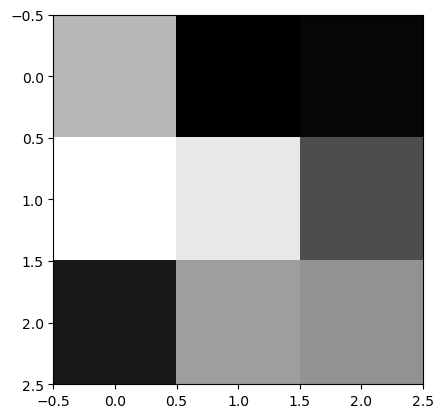

In [12]:
# shows the weights in layer 0 conv2d as gray map
top_layer = cnnModel.layers[0]
plt.imshow(top_layer.get_weights()[0][:, :, :, 0].squeeze(), cmap='gray')
plt.show()

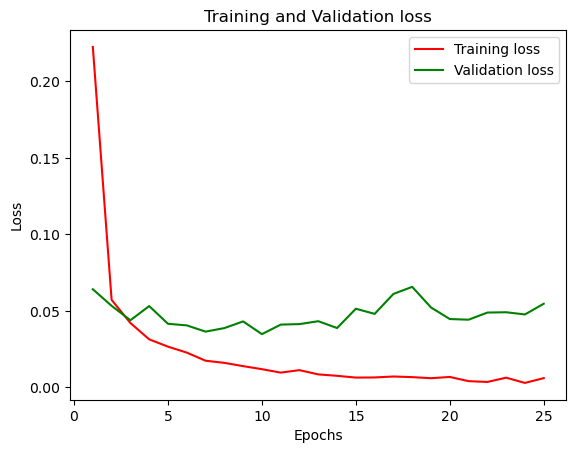

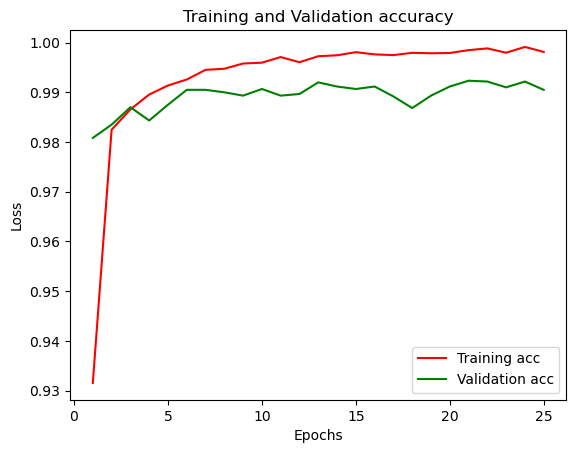

In [15]:
# plotting training and validation loss

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, color='red', label='Training loss')
plt.plot(epochs, val_loss, color='green', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# plotting training and validation accuracy

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, color='red', label='Training acc')
plt.plot(epochs, val_acc, color='green', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Confusion Matrix generation

### Prediction for a specific testing data generte confusion matrix

In [16]:
Y_prediction = cnnModel.predict(Xtest)

# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_prediction, axis = 1) 

# Convert validation observations to one hot vectors
Y_true = np.argmax(Ytest,axis = 1) 



313/313 [==============================] - 8s 21ms/step


In [17]:
# Classification Report

from sklearn.metrics import classification_report 

print(classification_report(Y_true, Y_pred_classes))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       980
           1       0.98      1.00      0.99      1135
           2       1.00      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.98      1.00      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



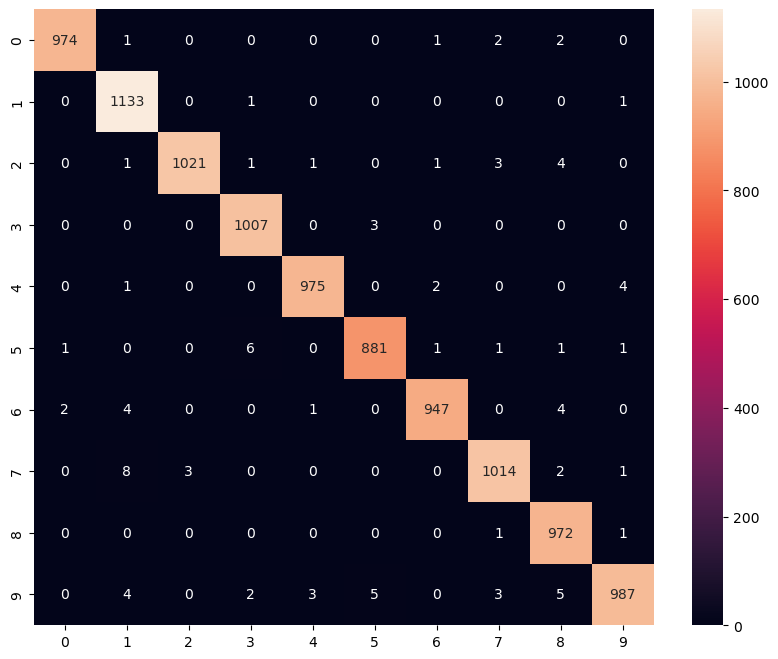

In [18]:
# confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 

plt.figure(figsize=(10,8))
sns.heatmap(confusion_mtx, annot=True, fmt="d");

Modify the code to get a better testing accuracy.
- Change the number of hidden units
- Increase the number of hidden layers
- Use a different optimizer
- Train for more epochs for better graphs

- Try using CIFAR dataset